<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/frequentPattern/basic/ECLATDiffset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Frequent Patterns in Big Data Using ECLATDiffset Algorithm

In this tutorial, we will discuss the first approach to find frequent patterns in big data using ECLATDiffset algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing ECLATDiffset on a single dataset at a particular minimum support value</a>

#### Step 0: install pami repository

In [1]:
!pip install -U pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.5 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=b0c1e320afda16aef74f20cec13dfe389bdeb31e424cf1bccd78be2395cf96f6
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4750 sha256=35da257d3c072dbf09fbfceac384379caba97f6d4b6290503716772f70978ce1
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


#### Step 1: Import the ECLATDiffset algorithm

In [2]:
from PAMI.frequentPattern.basic import ECLATDiffset  as alg

#### Step 2: Specify the following input parameters

In [3]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_chess.csv'

minimumSupportCount = 1000  #Users can also specify this constraint between 0 to 1.

seperator='\t'

#### Step 3: Execute the ECLATDiffset algorithm

In [4]:
obj = alg.ECLATDiffset(iFile=inputFile, minSup=minimumSupportCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Frequent patterns were generated successfully using ECLAT Diffset algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [10]:
obj.save(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [11]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [12]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 20983


##### Step 5.2: Runtime consumed by the mining algorithm

In [13]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 109.43083095550537


##### Step 5.3: Total Memory consumed by the mining algorithm

In [14]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 680685568
Memory (USS): 633675776


# Advanced Tutorial on Implementing ECLATDiffSet Algorithm

In this tutorial, we will discuss the second approach to find frequent patterns in big data using ECLATDiffSet algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the advanced approach by presenting the steps to discover frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the ECLATDiffSet algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the ECLATDiffSet algorithm and pandas data frame

In [15]:
from PAMI.frequentPattern.basic import ECLATDiffset  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [16]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_chess.csv'
seperator='\t'
minimumSupportCountList = [1000, 1500, 2000, 2500, 3000]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of ECLATDiffSet algorithm

#### Step 3: Execute the ECLATDiffSet algorithm using a for loop

In [17]:
algorithm = 'ECLATDiffset'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.ECLATDiffset(inputFile, minSup=minSupCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Frequent patterns were generated successfully using ECLAT Diffset algorithm
Frequent patterns were generated successfully using ECLAT Diffset algorithm
Frequent patterns were generated successfully using ECLAT Diffset algorithm
Frequent patterns were generated successfully using ECLAT Diffset algorithm
Frequent patterns were generated successfully using ECLAT Diffset algorithm


#### Step 4: Print the results

In [18]:
print(result)

      algorithm  minSup  patterns      runtime      memory
0  ECLATDiffset    1000     20983   108.858347   687800320
1  ECLATDiffset    1500    175338  1163.303607  3587756032
2  ECLATDiffset    2000      8263    94.194680  3577987072
3  ECLATDiffset    2500       917    91.603063  3577987072
4  ECLATDiffset    3000        46    93.158360  3578257408


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [19]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

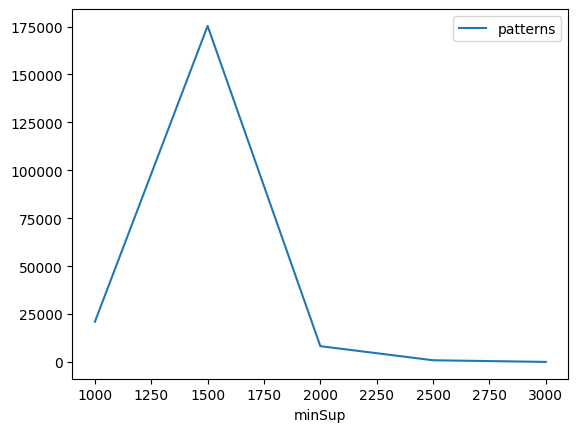

Graph for No Of Patterns is successfully generated!


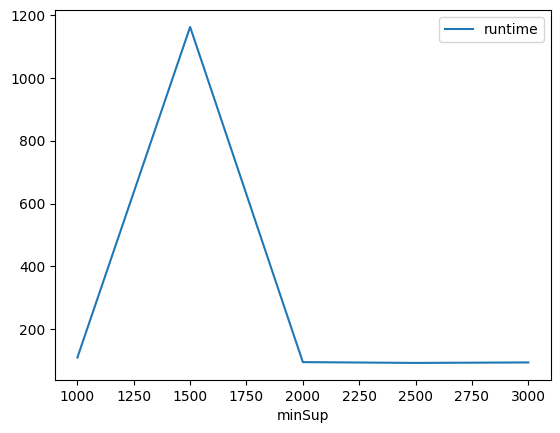

Graph for Runtime taken is successfully generated!


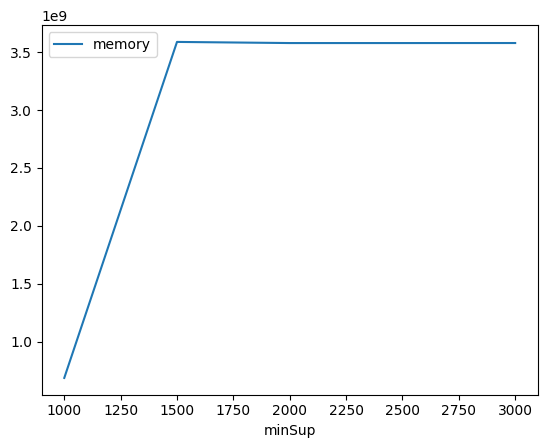

Graph for memory consumption is successfully generated!


In [20]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [21]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
